<a href="https://colab.research.google.com/github/Patrick-Setubal/Data_Science_Analytics/blob/main/puc/sprint2/ML/Sprint2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema


**Dataset:**
- **Link Kaggle:** https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?datasetId=1697740&sortBy=voteCount
- **Name:** Machine Predictive Maintenance Classification
- **Sobre os Dados:** Conjunto de dados sintético que reflete a manutenção preditiva real encontrada no setor.
- **License:** https://creativecommons.org/publicdomain/zero/1.0/
- **Tamanho:** 10000 Linhas e 10 Colunas

- **Features:**
  - UDI: Identificador Único de 1 a 10000
  - Product ID: Codigo do Equipamento
  - Type: Qualidade do equipamento em níveis
  - Air temperature [K]: Temperatura do ar
  - Process temperature [K]: Temperatura do Processo
  - Rotational speed [rpm]: Rotação
  - Torque [Nm]: Torque
  - Tool wear [min]: Minutos de uso
  - Target: Falha
  - Failure Type: Tipo de Falha

# Coleta dos Dados

In [ ]:
# Importações das bibliotecas

# Bibliotecas p/ dados
import pandas as pd
import numpy as np

# Bibliotecas p/ Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas p/ pre-processamento
from sklearn.preprocessing import StandardScaler # Padronização
from sklearn.preprocessing import MinMaxScaler # Normalização
from imblearn.over_sampling import SMOTE # Balancear dados não balanceados

# Bibliotecas p/ Treinar Modelos
from sklearn.model_selection import train_test_split # Separar em Treino e teste

# Bibliotecas com os Modelos
from sklearn.svm import LinearSVC # Classificação com Linhas
from sklearn.neighbors import KNeighborsClassifier # Classificação com vizinhos próximos
from sklearn.tree import DecisionTreeClassifier #Classificador arvore de decisão
from sklearn.naive_bayes import GaussianNB # Analisa pela probabilidade das Features
from sklearn.svm import SVC # Cria Dimensões para poder separas os dados
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas p/ Verificar modelo
from sklearn.model_selection import cross_val_predict # Testar Modelo com Validação Cruzada
from sklearn.model_selection import KFold # Definir Kfold para cross_val_score
from sklearn.metrics import confusion_matrix # Criar Matriz de confusão
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Todos os modos de verificação


# Bibliotecas e configuração para não exibir warning
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignorar o aviso "ConvergenceWarning"
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [ ]:
# Importando o Dataset
link = 'https://raw.githubusercontent.com/Patrick-Setubal/Data_Science_Analytics/main/puc/sprint2/predictive_maintenance.csv'
df = pd.read_csv(link)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Análise exploratória de dados

## Analise Geral

In [ ]:
# Verificar:
# Existe missings ?
# Tamanho do Dataset
# Formato das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Verificado que não existe dados faltantes, o type das colunas estão corretos e parece que não possui nenhum outlier.

## Col Type(object)

Verificar a distribuição das colunas no formato de Object, ou seja, textos

<Axes: ylabel='Target'>

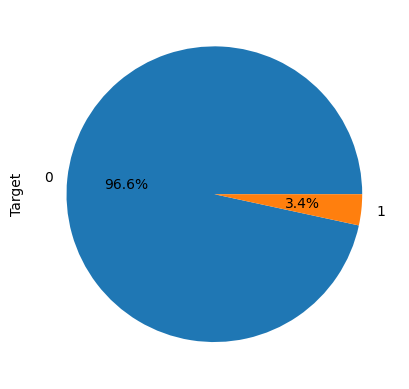

In [ ]:
# Ocorrência de 0 e 1 do target
df['Target'].value_counts().plot.pie(autopct='%.1f%%')

<Axes: ylabel='Type'>

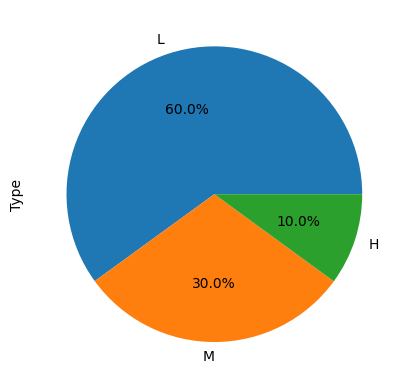

In [ ]:
# Ocorrência de 0 e 1 do target
df['Type'].value_counts().plot.pie(autopct='%.1f%%')

<Axes: xlabel='Type'>

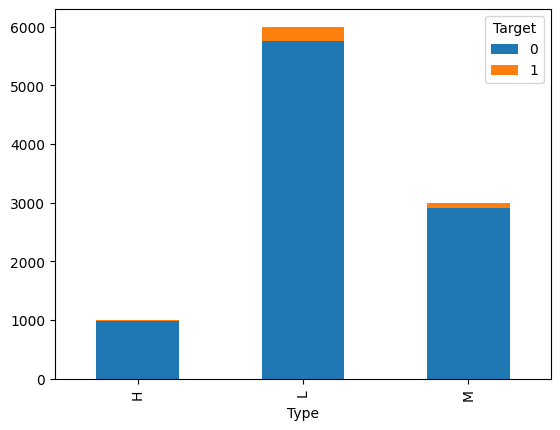

In [ ]:
# Tipos de Type e quantidade de Target em cada um deles
df.groupby(['Type', 'Target']).size().unstack().plot.bar(stacked=True)

<Axes: >

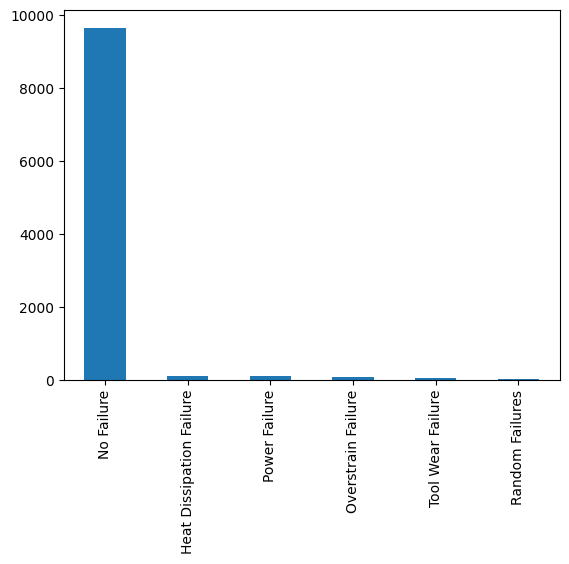

In [ ]:
df['Failure Type'].value_counts().plot.bar()

Verificado que os dados do target estão bem desbalanceados.
Não será utilizado a coluna 'Failure Type' objetivo é apenas definir se ouve ou não uma falha.
A quantidade de 'Target' para cada 'Type' parece proporcional.   

## Col Type(Float,Int)

Verificar as colunas de tipo numérico

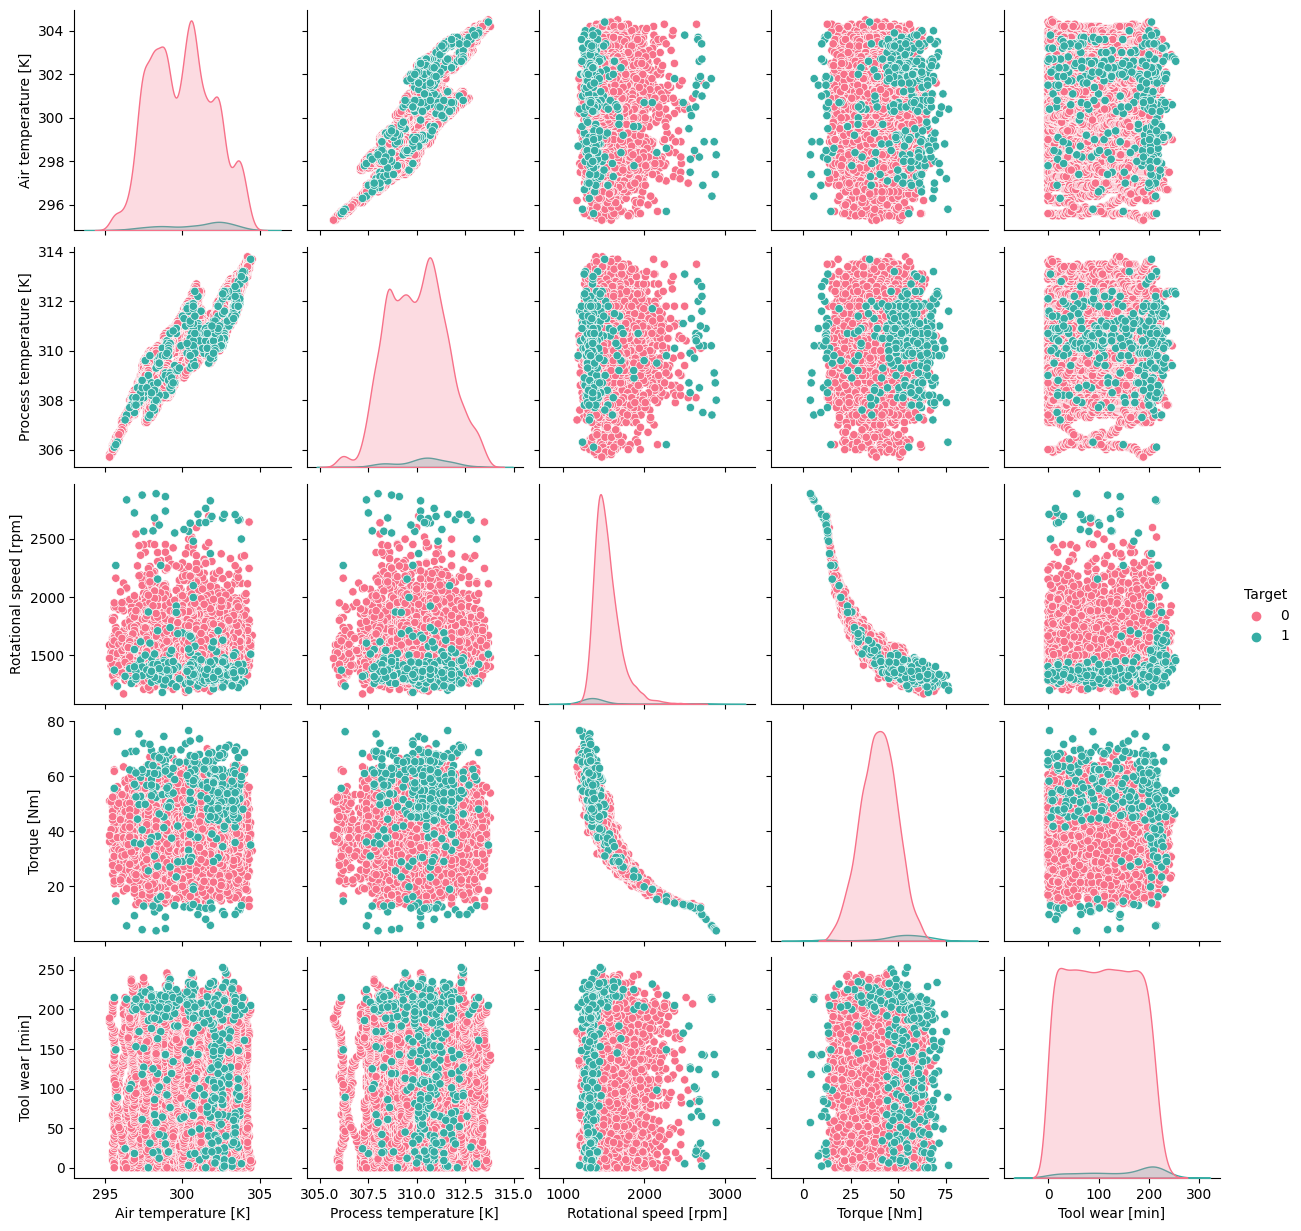

In [ ]:
# Verificar a Correlação dos dados
# Remover Colunas Numéricas que não somam como 'UDI' p/ ganho de desempenho
Col_Relevantes = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
df_sort = df.sort_values(by=['Target'])[Col_Relevantes] # Colocar o Target em ordem Para sobressair os Valores 1
sns.pairplot(df_sort, hue='Target', palette='husl') # Plotar correlações

Observações:
 - Correlação negativa entre Torque e rotação
 - Correlação positiva entre Temperaturas
 - As falhas nas colunas Torque e rotação costumas estar nas extremidades
 - As falhas nas colunas 'Tool Wear' correlacionadas com as temperaturas tendem a estar mais centralizadas

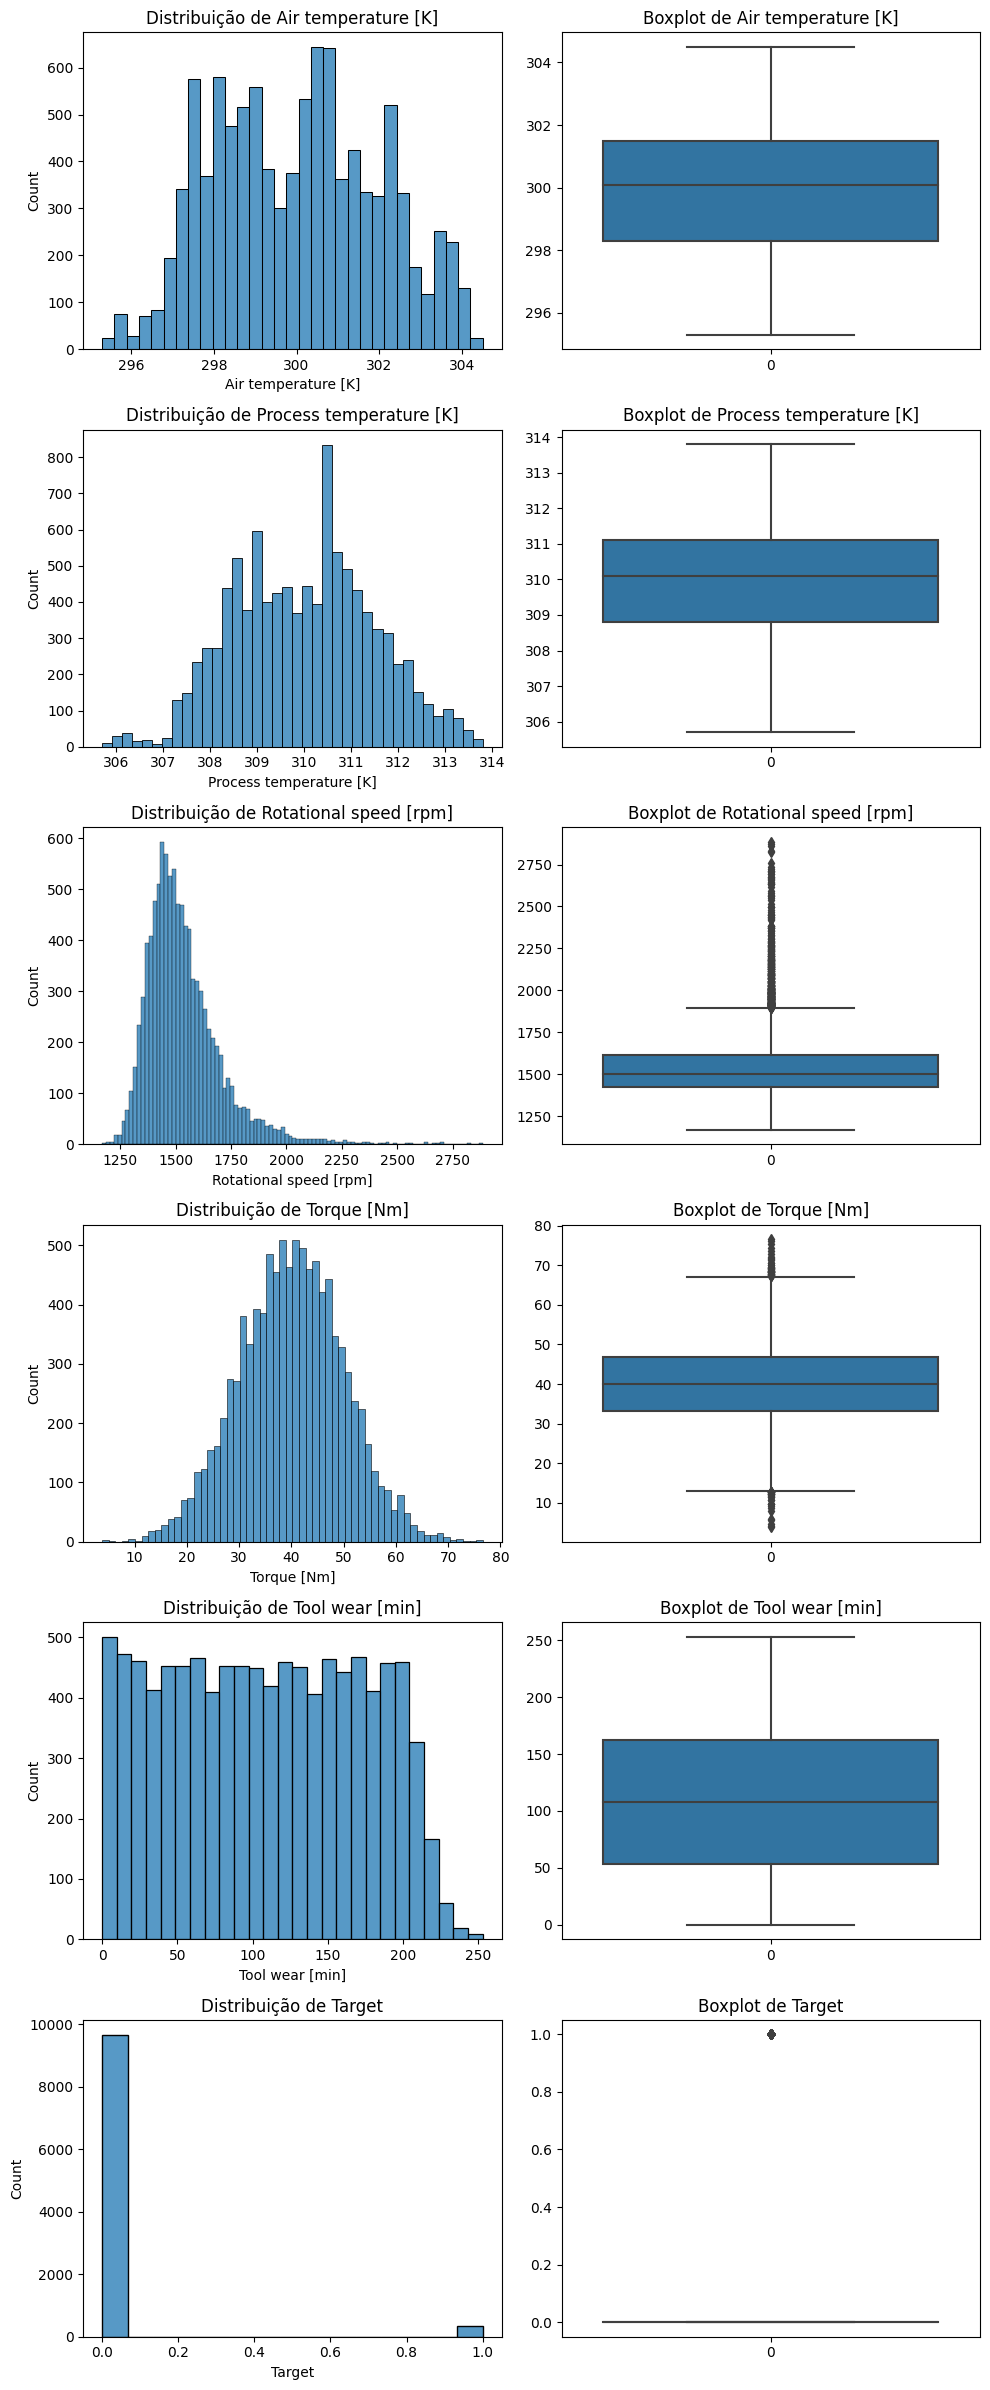

In [ ]:
# Criar Gráfico de distribuição e boxplot p/ Outliers
# Criar os subplots
num_rows = len(Col_Relevantes)
num_cols_subplot = 2

fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(10, num_rows*4))

# Percorrer colunas
for i, coluna in enumerate(df_sort.columns):
    # Plotar gráfico de distribuição
    sns.histplot(df_sort[coluna], ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribuição de {coluna}')

    # Plotar boxplot
    sns.boxplot(df_sort[coluna], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {coluna}')

plt.tight_layout() # Ajustar espaçamento entre subplots
plt.show() # Exibir os subplots


Verificado que os dados em sua maioria não se tem uma distribuição normal, e que a rotação e o torque existe grande variação de seus valores, porem pela sua natureza não será tratado como outlier

# Pré-Processamento

## Alterando Colunas Df

Iniciando o pre-processamento separando as colunas que serão utilizadas e alterando variáveis categóricas em numéricas

In [ ]:
# Definido Colunas Que serão pertinentes para o Modelo de classificação se houve ou não uma falha
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']]

# Alterando String para numérico
df['Type'] = df['Type'].map({'L': 1, 'M': 2, 'H': 3})

df.head()

<ipython-input-92-53ece497ae77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].map({'L': 1, 'M': 2, 'H': 3})


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


## Criando Variações do DF

Criar uma Seed do numpy para garantir que os dados aleatórios se repitam
Separando X e Y e criando variações do X tanto normalizado quanto padronizado

In [ ]:
# Definindo forma não aleatória para manter os valores
SEED = 3
np.random.seed(SEED)

# Separando X e Y
x = df.drop(columns=['Target'])
y = df['Target']

# Criando x Padronização
x_padonizado = pd.DataFrame(StandardScaler().fit(x).transform(x))

# Criando x Normalizando
x_normalizado = pd.DataFrame(MinMaxScaler().fit(x).transform(x))

# Exibindo diferença dos dados
display(x.head(3))
display(x_padonizado.head(3))
display(x_normalizado.head(3))

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5


,0,1,2,3,4,5
0,0.744413,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.745307,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.745307,-0.952389,-1.014761,-0.227450,0.944290,-1.617430


,0,1,2,3,4,5
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763


# Treinando Modelo

## Primeiros Modelos

Treinando Primeiro modelo utilizando o LinearSVC pós tenho mais experiencia com o mesmo.


Accuracy:  0.966
Precision:  0.0
Recall:  0.0
F1:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


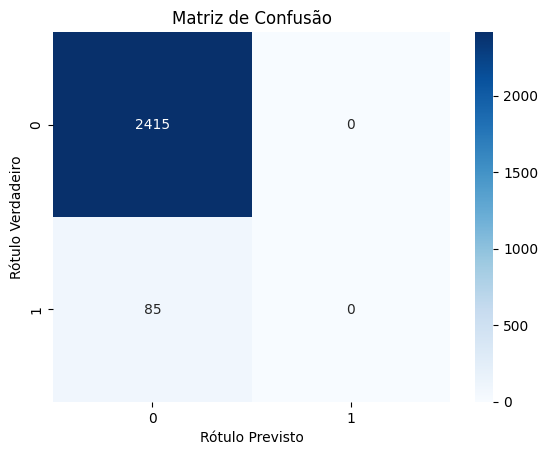

In [ ]:
# Definindo Treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size= 0.25, # Definindo proporção de teste
                                                        stratify= y) # Definindo Proporção do valor target entre treino e teste

# Treinando Modelo
model = LinearSVC()
model.fit(treino_x, treino_y)

# Testar Modelo
previsoes = model.predict(teste_x)

# Verificar Metricas
print('Accuracy: ',accuracy_score(teste_y, previsoes))
print('Precision: ',precision_score(teste_y, previsoes))
print('Recall: ',recall_score(teste_y, previsoes))
print('F1: ',f1_score(teste_y, previsoes))

# Criar Matrix de confusão
cm = confusion_matrix(teste_y, previsoes)

# Plotar Matriz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

Como os dados estão desbalanceados o modelo preferiu marcar que todos os casos não são falhas conseguindo uma acurácia de 97% para utilizar um parâmetro de avaliação mais justo para este caso será utilizado o F1 que obteve 0%

Utilizarei novamente o mesmo modelo, porem ao invés de utilizar "train_test_split" separarei meus dados direto com o "cross_val"

Accuracy:  0.8719
Precision:  0.029940119760479042
Recall:  0.08849557522123894
F1:  0.0447427293064877


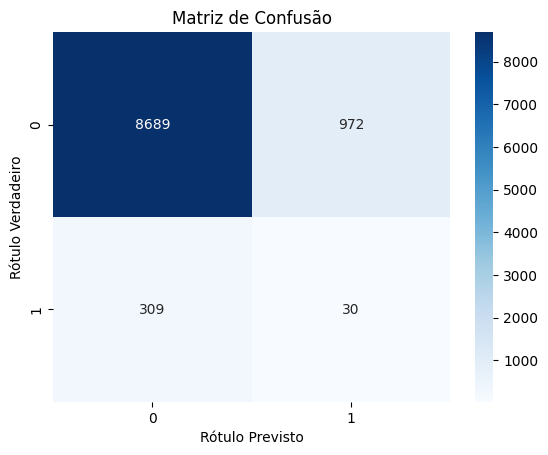

In [ ]:
# Definindo modelo
model = LinearSVC()

# Validação crussada
np.random.seed(5)
kfold = KFold(n_splits=10, shuffle=True, random_state=5) # Definindo Padrão para sempre dar o mesmo resultado
previsoes = cross_val_predict(model, x, y, cv=kfold)

# Verificar Metricas
print('Accuracy: ',accuracy_score(y, previsoes))
print('Precision: ',precision_score(y, previsoes))
print('Recall: ',recall_score(y, previsoes))
print('F1: ',f1_score(y, previsoes))

# Criar Matriz de confusão
cm = confusion_matrix(y, previsoes)

# Plotar Matriz
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Rótulo Previsto")
plt.ylabel("Rótulo Verdadeiro")
plt.show()

A validação cruzada se mostrou mais eficaz acertando 30 falhas e obtendo 4% de F1

testarei os próximos modelos utilizando validação cruzada em todos os próximos.

## Metodo Para Próximos Modelos

Criando função e dataframe para agilizar os testes dos modelos, utilizando a Validação Cruzada

In [ ]:
# Criando Df Para armazenar diferentes resultados dos modelos
df_ResultModel = pd.DataFrame({'Modelo': [], 'Accuracy': [],
                               'Precision' :[], 'Recall' :[],
                               'F1' :[], 'VP':[], 'VN':[], 'FP':[], 'FN':[],
                              })

# Definindo Função para treinar os modelos com Cross Validação
def Treinar_Model(Nome_Model, model, x, y, N_kfold):
  global df_ResultModel

  # Validação cruzada
  np.random.seed(5)
  kfold = KFold(n_splits=N_kfold, shuffle=True, random_state=5) # Definindo Padrão para sempre dar o mesmo resultado
  previsoes = cross_val_predict(model, x, y, cv=kfold) #Treinando Modelo

  # Criar Matriz de confusão
  cm = confusion_matrix(y, previsoes)

  # Preencher Df Resultado
  list_Result = [Nome_Model,
                accuracy_score(y, previsoes),
                precision_score(y, previsoes),
                recall_score(y, previsoes),
                f1_score(y, previsoes),
                cm[1][1], #'VP'
                cm[0][0], #'VN'
                cm[0][1], #'FP'
                cm[1][0] #'FN'
                ]

  df_ResultModel.loc[len(df_ResultModel)] = list_Result


## Treinando Modelos

Utilizando função e dataframe para testar 3 variações de 5 modelos diferentes

In [ ]:
# KNC
Treinar_Model('KNC', KNeighborsClassifier(), x, y, 10)
Treinar_Model('KNC Padronizado', KNeighborsClassifier(), x_padonizado, y, 10)
Treinar_Model('KNC Normalizado', KNeighborsClassifier(), x_normalizado, y, 10)

# DecisionTree
Treinar_Model('DecisionTree', DecisionTreeClassifier(), x, y, 10)
Treinar_Model('DecisionTree Padronizado', DecisionTreeClassifier(), x_padonizado, y, 10)
Treinar_Model('DecisionTree Normalizado', DecisionTreeClassifier(), x_normalizado, y, 10)

# GaussianNB
Treinar_Model('GaussianNB', GaussianNB(), x, y, 10)
Treinar_Model('GaussianNB Padronizado', GaussianNB(), x_padonizado, y, 10)
Treinar_Model('GaussianNB Normalizado', GaussianNB(), x_normalizado, y, 10)

# SVC
Treinar_Model('SVC', SVC(), x, y, 10)
Treinar_Model('SVC Padronizado', SVC(), x_padonizado, y, 10)
Treinar_Model('SVC Normalizado', SVC(), x_normalizado, y, 10)


# RandomForestClassifier
Treinar_Model('RandomForestClassifier', RandomForestClassifier(), x, y, 10)
Treinar_Model('RandomForestClassifier Padronizado', RandomForestClassifier(), x_padonizado, y, 10)
Treinar_Model('RandomForestClassifier Normalizado', RandomForestClassifier(), x_normalizado, y, 10)

display(df_ResultModel.sort_values(by='F1', ascending=False))


,Modelo,Accuracy,Precision,Recall,F1,VP,VN,FP,FN
13,RandomForestClassifier Padronizado,0.9851,0.909483,0.622419,0.739054,211,9640,21,128
14,RandomForestClassifier Normalizado,0.9850,0.902128,0.625369,0.738676,212,9638,23,127
12,RandomForestClassifier,0.9849,0.901709,0.622419,0.736475,211,9638,23,128
4,DecisionTree Padronizado,0.9793,0.698795,0.684366,0.691505,232,9561,100,107
3,DecisionTree,0.9791,0.695783,0.681416,0.688525,231,9560,101,108
5,DecisionTree Normalizado,0.9790,0.692537,0.684366,0.688427,232,9558,103,107
1,KNC Padronizado,0.9753,0.823944,0.345133,0.486486,117,9636,25,222
10,SVC Padronizado,0.9743,0.901961,0.271386,0.417234,92,9651,10,247
2,KNC Normalizado,0.9723,0.746032,0.277286,0.404301,94,9629,32,245
0,KNC,0.9693,0.666667,0.188791,0.294253,64,9629,32,275


O melhor resultado foi o RandomForestClassifier com os dados Padronizado obteve 73% no F1

# Pré-Processamento 2 Balanceando dados

Para tentar obter um resultado melhor, será utilizado o método SMOTE para balancear os dados

In [ ]:
# Criando Dados Balanceados
smote = SMOTE(random_state=5)
x_Smote, y_Smote = smote.fit_resample(x, y) # Realiza a amostragem do conjunto de dados

# Padronizando e normalizando dados balanceados
# Criando x_Smote Padronização
x_Smote_padonizado = pd.DataFrame(StandardScaler().fit(x_Smote).transform(x_Smote))

# Criando x_Smote Normalizando
x_Smote_normalizado = pd.DataFrame(MinMaxScaler().fit(x_Smote).transform(x_Smote))

# Treinando Modelos

Todos os modelos e suas variações serão treinadas de novo, porem utilizando os dados balanceado, seus resultados também serão exibidos no dataframe

In [ ]:
# KNC
Treinar_Model('Smote KNC', KNeighborsClassifier(), x_Smote, y_Smote, 10)
Treinar_Model('Smote KNC Padronizado', KNeighborsClassifier(), x_Smote_padonizado, y_Smote, 10)
Treinar_Model('Smote KNC Normalizado', KNeighborsClassifier(), x_Smote_normalizado, y_Smote, 10)

# DecisionTree
Treinar_Model('Smote DecisionTree', DecisionTreeClassifier(), x_Smote, y_Smote, 10)
Treinar_Model('Smote DecisionTree Padronizado', DecisionTreeClassifier(), x_Smote_padonizado, y_Smote, 10)
Treinar_Model('Smote DecisionTree Normalizado', DecisionTreeClassifier(), x_Smote_normalizado, y_Smote, 10)

# GaussianNB
Treinar_Model('Smote GaussianNB', GaussianNB(), x_Smote, y_Smote, 10)
Treinar_Model('Smote GaussianNB Padronizado', GaussianNB(), x_Smote_padonizado, y_Smote, 10)
Treinar_Model('Smote GaussianNB Normalizado', GaussianNB(), x_Smote_normalizado, y_Smote, 10)

# SVC
Treinar_Model('Smote SVC', SVC(), x_Smote, y_Smote, 10)
Treinar_Model('Smote SVC Padronizado', SVC(), x_Smote_padonizado, y_Smote, 10)
Treinar_Model('Smote SVC Normalizado', SVC(), x_Smote_normalizado, y_Smote, 10)


# RandomForestClassifier
Treinar_Model('Smote RandomForestClassifier', RandomForestClassifier(), x_Smote, y_Smote, 10)
Treinar_Model('Smote RandomForestClassifier Padronizado', RandomForestClassifier(), x_Smote_padonizado, y_Smote, 10)
Treinar_Model('Smote RandomForestClassifier Normalizado', RandomForestClassifier(), x_Smote_normalizado, y_Smote, 10)

display(df_ResultModel.sort_values(by='F1', ascending=False))

,Modelo,Accuracy,Precision,Recall,F1,VP,VN,FP,FN
28,Smote RandomForestClassifier Padronizado,0.976814,0.967712,0.986544,0.977037,9531,9343,318,130
29,Smote RandomForestClassifier Normalizado,0.976762,0.967519,0.986647,0.976990,9532,9341,320,129
27,Smote RandomForestClassifier,0.976555,0.967127,0.986647,0.976789,9532,9337,324,129
18,Smote DecisionTree,0.965066,0.958376,0.972363,0.965319,9394,9253,408,267
19,Smote DecisionTree Padronizado,0.965066,0.958563,0.972156,0.965312,9392,9255,406,269
20,Smote DecisionTree Normalizado,0.964859,0.958265,0.972053,0.965110,9391,9252,409,270
16,Smote KNC Padronizado,0.955077,0.927135,0.987786,0.956500,9543,8911,750,118
17,Smote KNC Normalizado,0.954611,0.926573,0.987475,0.956056,9540,8905,756,121
15,Smote KNC,0.935721,0.900714,0.979402,0.938411,9462,8618,1043,199
25,Smote SVC Padronizado,0.935928,0.916609,0.959114,0.937380,9266,8818,843,395


O melhor modelo se tornou o RandomForestClassifier com os dados balanceados pelo Smote e Padronizado obtendo a pontuação de
- Accuracy: 97.68%
- Precision: 96.77%
- Recall: 98.65%
- F1: 97.70%